# Read and Copy the dimensions


In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import os

NEWFILE_PATH = 'newfiletest.nc'

WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'
#Open original for reading and new diagnostic for writing
orig_dataset = netCDF4.Dataset(WRFOUT_FILE_PATH, 'r')

#if newfile already exits, remove it to avoid potential
#permission problems
if os.path.isfile(NEWFILE_PATH):
    os.remove(NEWFILE_PATH)
diag_dataset = netCDF4.Dataset(NEWFILE_PATH, 'w', clobber=True)

# List of all dimensions from original dataset
# This is just for show
dimkeys = orig_dataset.dimensions.keys()
print('dimkeys: ' + str(dimkeys))
for the_key in orig_dataset.dimensions.keys():
    print('key: ' + str(the_key) +
         ', name: ' + str(orig_dataset.dimensions[the_key].name) + 
         ', value: ' + str(orig_dataset.dimensions[the_key].size))

# Write the same dimension to the diagnostic dataset
for the_key in orig_dataset.dimensions.keys():
    the_value = orig_dataset.dimensions[the_key].size
    the_name = orig_dataset.dimensions[the_key].name
    diag_dataset.createDimension(the_name, the_value)
    

# List all global attributes and their values
#This is just for show
# global_attributes = orig_dataset.ncattrs()
# for attr in global_attributes:
#     print(attr + ': ' + str(getattr(orig_dataset, attr)))
    
# Write the global attributes to diagnostic file
for attr in orig_dataset.ncattrs():
    attr_value = getattr(orig_dataset, attr)
    setattr(diag_dataset, attr, attr_value)

# orig_dataset.close
# diag_dataset.close  

dimkeys: odict_keys(['Time', 'DateStrLen', 'west_east', 'south_north', 'bottom_top', 'bottom_top_stag', 'soil_layers_stag', 'west_east_stag', 'south_north_stag'])
key: Time, name: Time, value: 1
key: DateStrLen, name: DateStrLen, value: 19
key: west_east, name: west_east, value: 97
key: south_north, name: south_north, value: 69
key: bottom_top, name: bottom_top, value: 50
key: bottom_top_stag, name: bottom_top_stag, value: 51
key: soil_layers_stag, name: soil_layers_stag, value: 4
key: west_east_stag, name: west_east_stag, value: 98
key: south_north_stag, name: south_north_stag, value: 70


In [2]:
# Create pressure height and temperature fields and write to new file

# Let's get the P and PB arrays
P = orig_dataset.variables['P'][:]
PB = orig_dataset.variables['PB'][:]

# Create the total pressure millibar field
P_mb = (P + PB) * 0.01

# Write it, along with attributes, to the diagnostic field
pmb = diag_dataset.createVariable('P_mb', np.float32, 
                                 ('Time', 'bottom_top',
                                  'south_north', 'west_east'))
pmb.units = "mb"
pmb.long_name = "Pressure"
pmb[:] = P_mb

In [3]:
#Then, Compute the temperature in degrees centigrade
theta = orig_dataset.variables['T'][:] + 300.00
T_c = theta*((P_mb)/1000.0)*(2.0/7.0)-273

# Write the T_c variables to the diagnostic file
tc = diag_dataset.createVariable('T_c', np.float32, 
                                ('Time', 'bottom_top',
                                'south_north', 'west_east'))
tc.units = "c"
tc.long_name = "Temperature"
tc[:] = T_c


diag_dataset.close()
orig_dataset.close()

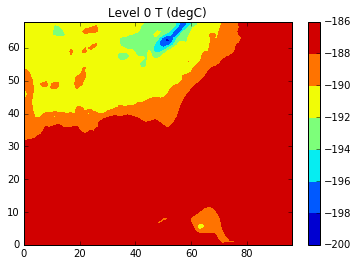

In [4]:
#No, open the diagnostic dataset and plot T_c
# at the lowest level
dataset = netCDF4.Dataset(NEWFILE_PATH, 'r')

tc_var = dataset.variables['T_c']
tc = tc_var[:]

plt.contourf(tc[0,0,:,:])
plt.title("Level 0 T (degC)")
plt.colorbar()
plt.show()

dataset.close()